In [1]:
from google.colab import files

uploaded = files.upload()


Saving 1644871288_9775174_cleveland-test.csv to 1644871288_9775174_cleveland-test.csv
Saving 1644871288_9762487_cleveland-train.csv to 1644871288_9762487_cleveland-train.csv


In [32]:
# Let's import libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [33]:
#file = open('1644871288_9762487_cleveland-train.csv')
df = pd.read_csv("1644871288_9762487_cleveland-train.csv")
# First 5 rows of our data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease::category|-1|1
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [34]:
df=df.rename(columns=({"heartdisease::category|-1|1":"final"}))
df["final"] = df.final.replace(-1,0)
df.final.value_counts()

0    86
1    66
Name: final, dtype: int64

In [35]:
countNoDisease = len(df[df.final == -1])
countHaveDisease = len(df[df.final == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.final))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.final))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 43.42%


In [36]:
y = df.final.values
x_data = df.drop(['final'], axis = 1)

In [37]:
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [38]:
# Normalize
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# transform data

x = scaler.fit_transform(x_data)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_train.shape

(13, 121)

In [41]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0)
    bias = 0.0
    return weight,bias

In [42]:
def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

iteration: 100000
cost: 0.5343207774423216


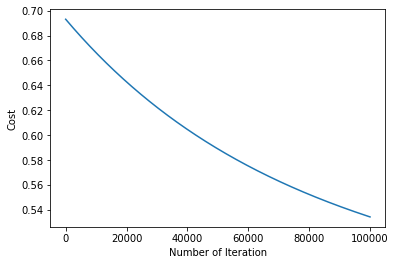

Manual Test Accuracy: 83.87%


In [43]:
#%%time
def gradientCostFunction(weight,bias,x_train,y_train):
    yHead = sigmoid(np.dot(weight.T,x_train) + bias)
    dW = np.dot(x_train,((yHead-y_train).T))/x_train.shape[1]
    dB = np.sum(yHead-y_train)/x_train.shape[1]
    loss = -(y_train*np.log(yHead) + (1-y_train)*np.log(1-yHead))
    cost = np.sum(loss) / x_train.shape[1]
    gradients = {"Derivative_Weight" : dW, "Derivative_Bias" : dB}
    return cost,gradients

def predictFunction(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    yHead = sigmoid(z)
    y_pred = np.zeros((1,x_test.shape[1]))
    
    for i in range(yHead.shape[1]):
        if yHead[0,i] <= 0.5:
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1
    return y_pred

def weightUpdate(weight,bias,x_train,y_train,learningRate,iteration):
    costList = []
    index = []
    for i in range(iteration):
        cost,gradients = gradientCostFunction(weight,bias,x_train,y_train)
        if(np.all(gradients["Derivative_Weight"]<0.001) and gradients["Derivative_Bias"]<0.001):
          break
        weight = weight - learningRate * gradients["Derivative_Weight"]
        bias = bias - learningRate * gradients["Derivative_Bias"]
        costList.append(cost)
        index.append(i)
        parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = weightUpdate(weight,bias,x_train,y_train,learningRate,iteration)
    y_pred = predictFunction(parameters["weight"],parameters["bias"],x_test)
    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_pred - y_test))*100)/100*100))
    return parameters["weight"],parameters["bias"], y_pred

preditcted_weight, predicted_bias, y_pred=logistic_regression(x_train,y_train,x_test,y_test,0.00001,100000)

In [44]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Test Accuracy {:.2f}%".format(lr.score(x_test.T,y_test.T)*100))

Test Accuracy 80.65%


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.T))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31



[[11  3]
 [ 2 15]]


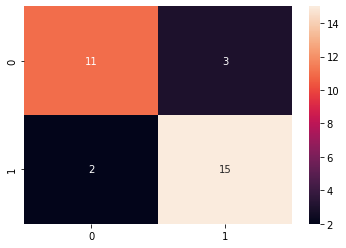

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred.T))
sns.heatmap(confusion_matrix(y_test,y_pred.T),annot=True)

In [47]:
td = pd.read_csv("1644871288_9775174_cleveland-test.csv")
# First 5 rows of our data
td.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# transform data

x_testdata= scaler.fit_transform(td)

In [49]:
#transpose matrices
x_test_data = x_testdata.T
x_test_data.shape

(13, 145)

In [50]:
def predictTestData(weight,bias,x_test_data):
    count=[]
    z = np.dot(weight.T,x_test_data) + bias
    y_head = sigmoid(z)
    #y_prediction = np.zeros((1,x_test_data.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            count.append(-1)
        else:
            count.append(1)
    return pd.DataFrame(count)
    

In [51]:
preditcted_weight, predicted_bias

(array([[ 0.0687979 ],
        [ 0.10634331],
        [ 0.13514304],
        [ 0.05964734],
        [-0.01275812],
        [-0.01654292],
        [ 0.03365574],
        [-0.12910171],
        [ 0.10725155],
        [ 0.10315615],
        [ 0.06170405],
        [ 0.1713919 ],
        [ 0.18916931]]), -0.07785220068099076)

In [52]:
y_pred_test = predictTestData(preditcted_weight, predicted_bias, x_test_data)

output = open('./outputAssing2.txt', 'w')

output.write(y_pred_test.to_string(header=False, index=False))
output.close()

# New Section